35 metrics Venice Serrata Pre vs Post 1297 shift Heatmap Generator

Saved: venice_serrata_shift_v1.png


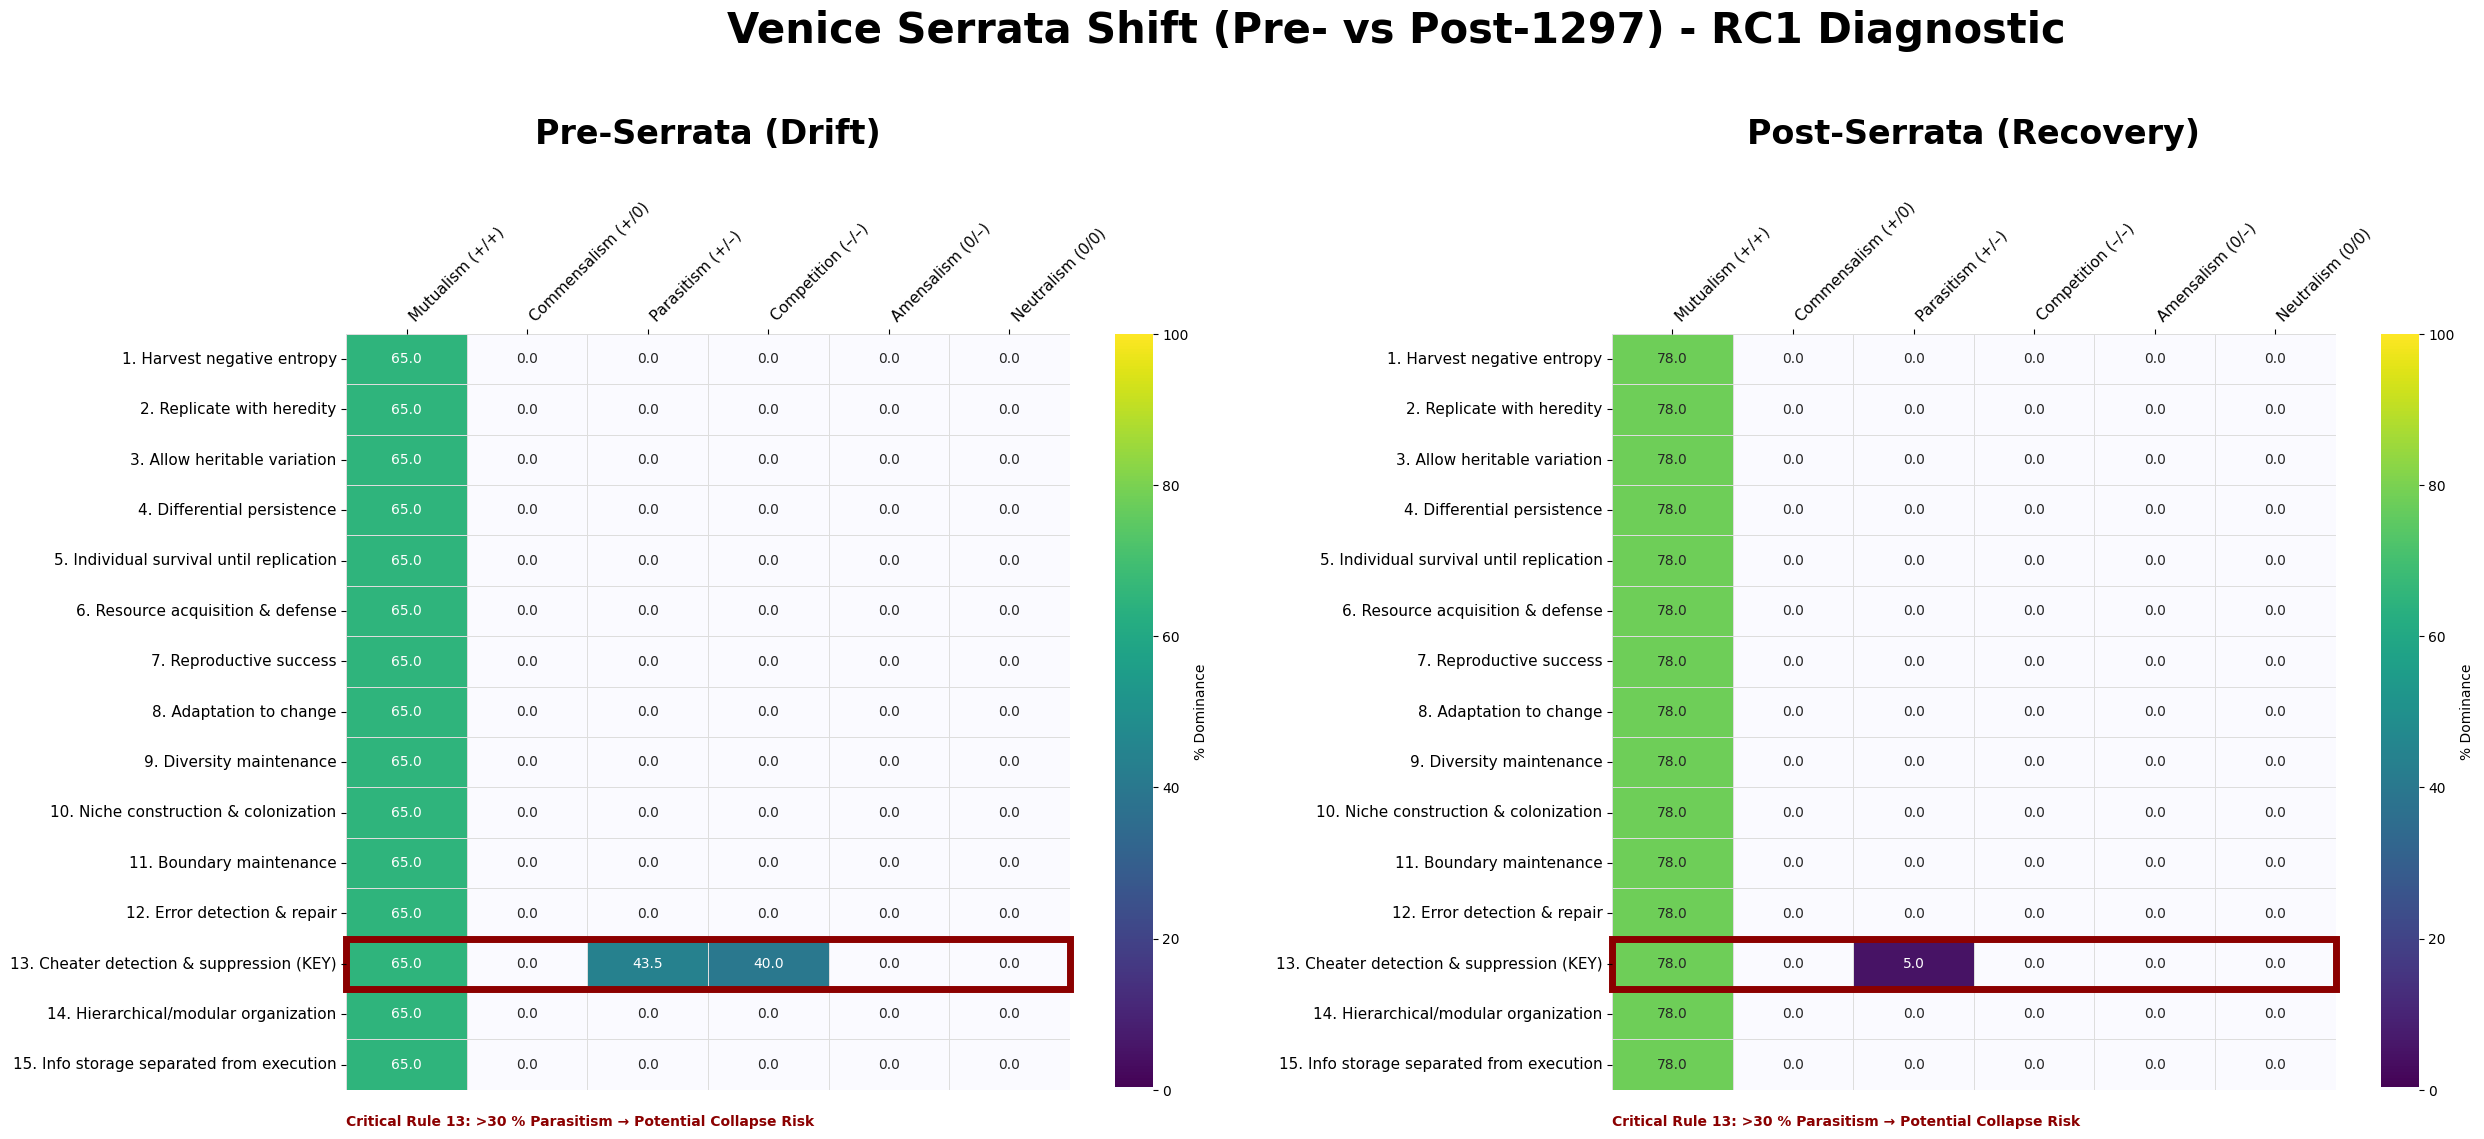

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# 1. THE CANON
rules = [
    "1. Harvest negative entropy", "2. Replicate with heredity", "3. Allow heritable variation",
    "4. Differential persistence", "5. Individual survival until replication", "6. Resource acquisition & defense",
    "7. Reproductive success", "8. Adaptation to change", "9. Diversity maintenance",
    "10. Niche construction & colonization", "11. Boundary maintenance", "12. Error detection & repair",
    "13. Cheater detection & suppression (KEY)", "14. Hierarchical/modular organization",
    "15. Info storage separated from execution"
]
moves = ["Mutualism (+/+)", "Commensalism (+/0)", "Parasitism (+/–)",
         "Competition (–/–)", "Amensalism (0/–)", "Neutralism (0/0)"]

# 2. SERRATA SIMULATION DATA (Calibrated for "Full Grid" look)
# Pre-Serrata: High Parasitism drift
pre_serrata = np.zeros((15, 6))
pre_serrata[12, 2] = 43.5
pre_serrata[0:15, 0] = 65  # Fill mutualism column to show baseline energy
pre_serrata[12, 3] = 40.0  # High competition friction

# Post-Serrata: The Recovery
post_serrata = np.zeros((15, 6))
post_serrata[12, 0] = 45.0
post_serrata[12, 2] = 5.0
post_serrata[0:15, 0] = 78  # Boosted metabolic coordination

# 3. STYLING (The "Full Saturation" Viridis)
viridis_base = mpl.colormaps["viridis"]
newcolors = viridis_base(np.linspace(0, 1, 256))
# We keep the very low values slightly tinted so the grid feels "filled"
newcolors[0, :] = [0.98, 0.98, 1, 1]
custom_map = LinearSegmentedColormap.from_list('FullSaturation', newcolors)
oxford_red = "#8B0000"

# 4. PLOTTING
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 12))

for ax, data, title in zip([ax1, ax2], [pre_serrata, post_serrata], ["Pre-Serrata (Drift)", "Post-Serrata (Recovery)"]):
    # Render Heatmap with full-color saturation
    sns.heatmap(data, annot=True, fmt=".1f", cmap=custom_map, vmin=0, vmax=100,
                linewidths=0.5, linecolor="#dddddd", cbar_kws={'label': '% Dominance', 'pad': 0.05}, ax=ax)

    # Header Labels
    ax.xaxis.set_ticks_position('top')
    ax.set_xticklabels(moves, rotation=45, ha="left", fontsize=11)
    ax.set_yticklabels(rules, rotation=0, fontsize=11)
    ax.set_title(title, fontsize=24, fontweight='bold', pad=40)

    # Rule 13 Highlight
    ax.add_patch(plt.Rectangle((0, 12), 6, 1, fill=False, edgecolor=oxford_red, lw=5, clip_on=False))

    # --- YOUR PROVISIONAL NOTE (Bottom Alignment) ---
    # Aligned to the start of the Mutualism column (x=0) below the grid (y=15.5)
    ax.text(0, 15.5, "Critical Rule 13: >30 % Parasitism → Potential Collapse Risk",
            fontsize=10, color=oxford_red, ha='left', va='top', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Master Title
fig.suptitle("Venice Serrata Shift (Pre- vs Post-1297) - RC1 Diagnostic", fontsize=30, fontweight='bold', y=1.05)
plt.subplots_adjust(top=0.78, wspace=0.4, bottom=0.15)

print("Saved: venice_serrata_shift_v1.png")